In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US_DA = df[(df['job_country']=='United States') & (df['job_title_short'] == 'Data Analyst')].dropna(subset= 'salary_year_avg')

In [3]:
df_US_DA_exp = df_US_DA.explode('job_skills')

### Calculate Percent of Job Postings that Have Skills


In [8]:
df_skills = df_US_DA_exp.groupby('job_skills').agg(median_salary= ('salary_year_avg', 'median'), skill_count= ('job_skills', 'count')).sort_values('skill_count',ascending=False)
df_skills

,median_salary,skill_count
job_skills,,
sql,91000.0,2508
excel,84392.0,1808
python,97500.0,1431
tableau,92875.0,1364
sas,90000.0,926
...,...,...
couchbase,160515.0,1
chainer,100000.0,1
chef,85000.0,1


In [7]:
DA_total = len(df_US_DA) # Find count of Data Analyst jobs in US with salary info then use it to find the percentage of each skill mentioned in job postings
DA_total

4350

In [9]:
# a row represent a job posting, so the number of the rows the total job postings
# dividing the skill count over the total job postings gives you the percentage at which the specific skill was mentioned in job postings
df_skills['skill_percent'] =df_skills['skill_count']/ DA_total *100
df_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.0,2508,57.655172
excel,84392.0,1808,41.563218
python,97500.0,1431,32.896552
tableau,92875.0,1364,31.356322
sas,90000.0,926,21.287356
...,...,...,...
couchbase,160515.0,1,0.022989
chainer,100000.0,1,0.022989
chef,85000.0,1,0.022989


### Median Salary vs Percent Skill Demand

In [10]:
skills_stat = df_skills[df_skills['skill_percent']> 5] # 5 is an arbitrary number just to limit the analysis the most mentioned skills
skills_stat

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.00,2508,57.655172
excel,84392.00,1808,41.563218
python,97500.00,1431,32.896552
tableau,92875.00,1364,31.356322
sas,90000.00,926,21.287356
r,92500.00,893,20.528736
power bi,90000.00,838,19.264368
powerpoint,85000.00,462,10.620690
word,81194.75,461,10.597701


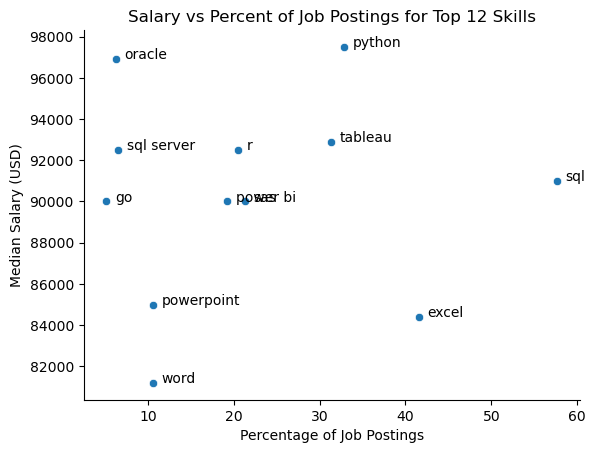

In [12]:
sns.scatterplot(data= skills_stat, x= 'skill_percent', y= 'median_salary')
sns.despine()
for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_percent'].iloc[i]+ 1 , skills_stat['median_salary'].iloc[i], txt)


plt.title('Salary vs Percent of Job Postings for Top 12 Skills')
plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Salary (USD)')
plt.show()

adjusting overlapping texts using an if condition inside of the for loop

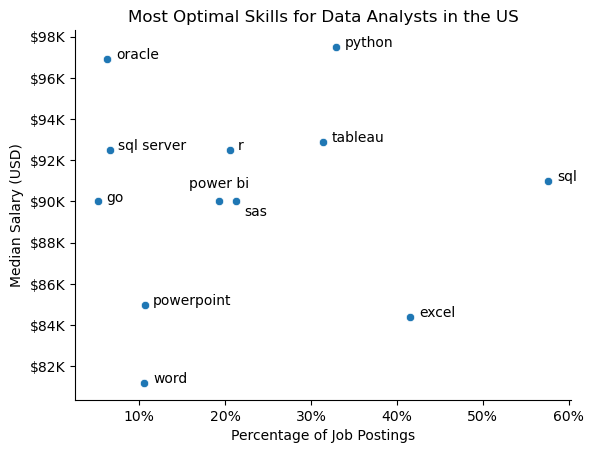

In [16]:
sns.scatterplot(data= skills_stat, x='skill_percent', y= 'median_salary')
sns.despine()

for i, txt in enumerate(skills_stat.index):
    
    # Adjust text positions for overlapping labels
    if skills_stat.index[i] == "power bi":
        plt.text(skills_stat['skill_percent'].iloc[i]- 3.5, skills_stat['median_salary'].iloc[i] + 650, "power bi")  # Move power bi up and left
    elif skills_stat.index[i] == "sas":
        plt.text(skills_stat['skill_percent'].iloc[i]+ 1, skills_stat['median_salary'].iloc[i] - 700, "sas")  # Move sas down
    else:
        plt.text(skills_stat['skill_percent'].iloc[i]+ 1 , skills_stat['median_salary'].iloc[i], txt)  # Default position

# formating the y and x axis
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

from  matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Set axis labels and title
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Salary (USD)')
plt.show()

Tried using annotate with `np.random.uniform()` instead of text but gave similar result

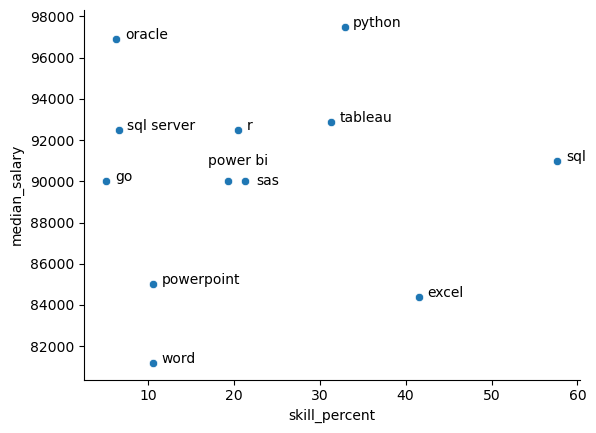

In [15]:
sns.scatterplot(data= skills_stat, x= 'skill_percent', y= 'median_salary')
sns.despine()

import numpy as np
for i, txt in enumerate(skills_stat.index):

    if skills_stat.index[i] == "power bi":
        plt.annotate(txt, 
                 (skills_stat['skill_percent'].iloc[i]+ 1 , skills_stat['median_salary'].iloc[i]), 
                 xytext=(-20, np.random.uniform(-10, 10)),  # Move the text slightly
                 textcoords='offset points',
                 ha='left', va='bottom')
        
    elif skills_stat.index[i] == "sas":
        plt.annotate(txt, 
                 (skills_stat['skill_percent'].iloc[i]+ 1 , skills_stat['median_salary'].iloc[i]), 
                 xytext=(2, -5),  # Move the text slightly
                 textcoords='offset points',
                 ha='left', va='bottom')    

    else:
        plt.text(skills_stat['skill_percent'].iloc[i]+ 1 , skills_stat['median_salary'].iloc[i], txt)  # Default position

### Bonus: Coloring by Technology

In [17]:
df_technology = df['job_type_skills']
df_technology= df_technology.drop_duplicates().dropna()
df_technology # the values are a mix of strings and lists and they exist as stings of dictionaries in the df ('{}','{}')

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [181]:
df_technology.values

array(["{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",
       "{'analyst_tools': ['dax'], 'cloud': ['azure'], 'libraries': ['airflow'], 'other': ['docker', 'kubernetes', 'jenkins'], 'programming': ['python', 'sql', 'c#']}",
       "{'cloud': ['aws'], 'libraries': ['tensorflow', 'keras', 'pytorch'], 'programming': ['python', 'c++', 'java', 'matlab']}",
       ...,
       "{'cloud': ['bigquery'], 'libraries': ['gdpr'], 'other': ['git', 'gitlab', 'github'], 'programming': ['sql']}",
       "{'cloud': ['bigquery', 'aws'], 'libraries': ['airflow'], 'other': ['github', 'docker'], 'programming': ['sql', 'python'], 'webframeworks': ['fastapi']}",
       "{'os': ['linux', 'unix'], 'other': ['kubernetes', 'docker', 'ansible'], 'programming': ['bash', 'python', 'perl']}"],
      dtype=object)

**Summary**
- This code takes a list of dictionary-like strings from `df_technology` and combines them into a single dictionary.
- If a key appears in multiple rows, its values are summed.
- The result is a dictionary where each key represents a technology and its values across all rows.


In [18]:
tech_dict =  {} # Initialize an empty dictionary

for row in df_technology:   # Loop through each row in df_technology
    row_dict= ast.literal_eval(row) # Convert the string row into a dictionary
    
    for key, value in row_dict.items():  # Loop through key-value pairs of the dictionary
        if key in tech_dict:  # If the key already exists in tech_dict  # it's here for after the first loop
            tech_dict[key] += value  # Add the value to the existing key
        else:  # If the key is not in tech_dict
            tech_dict[key] = value  # Initialize the key with the value

# remove duplicates by converting values to set then back to list
for keys , values in tech_dict.items():
    tech_dict[keys]= list(set(values))

tech_dict

{'analyst_tools': ['esquisse',
  'dax',
  'spss',
  'splunk',
  'sharepoint',
  'ssrs',
  'powerpoint',
  'qlik',
  'looker',
  'nuix',
  'msaccess',
  'cognos',
  'sas',
  'sheets',
  'excel',
  'sap',
  'power bi',
  'spreadsheet',
  'visio',
  'datarobot',
  'word',
  'tableau',
  'outlook',
  'powerbi',
  'ssis',
  'microstrategy',
  'alteryx',
  'ms access'],
 'programming': ['mongodb',
  'cobol',
  'objective-c',
  'swift',
  'lisp',
  'kotlin',
  'pascal',
  'apl',
  'shell',
  'elixir',
  'erlang',
  'visual basic',
  'bash',
  'nosql',
  't-sql',
  'html',
  'ocaml',
  'golang',
  'mongo',
  'php',
  'sas',
  'ruby',
  'no-sql',
  'r',
  'javascript',
  'dart',
  'typescript',
  'vb.net',
  'c#',
  'solidity',
  'haskell',
  'f#',
  'java',
  'visualbasic',
  'crystal',
  'rust',
  'vba',
  'css',
  'groovy',
  'matlab',
  'c',
  'powershell',
  'lua',
  'sass',
  'assembly',
  'fortran',
  'go',
  'scala',
  'clojure',
  'julia',
  'python',
  'perl',
  'c++',
  'sql',
  'del

The `list()` function ensures tech_dict.items() is converted into a list of tuples, making it compatible with `pd.DataFrame()`. Without `list()`, it may still work in some cases, but explicitly converting to a list ensures consistency, especially when working with older versions of pandas or when iterating over items in certain contexts.

In [19]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns= ['technology', 'skills']).explode('skills') # I need to spicify the columns because it's a dict
# in this case it works without list()
df_tech

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,dax
0,analyst_tools,spss
0,analyst_tools,splunk
0,analyst_tools,sharepoint
...,...,...
9,sync,zoom
9,sync,mattermost
9,sync,rocketchat
9,sync,twilio


In [20]:
DA_skills_stat = pd.merge(skills_stat,df_tech ,how= 'left', left_on='job_skills', right_on='skills')
# another way of writing it->  df_DA_skills_tech = skills_stat.merge(df_tech, left_on='job_skills', right_on='skills')
DA_skills_stat.set_index('skills', inplace=True)
DA_skills_stat.drop_duplicates(subset= 'skill_count', inplace=True) #  there is two of sas one analyst_tools and one programming in the dataframe so I dropped one because sas would be bold in the scatterplot otherwise
DA_skills_stat

,median_salary,skill_count,skill_percent,technology
skills,,,,
sql,91000.00,2508,57.655172,programming
excel,84392.00,1808,41.563218,analyst_tools
python,97500.00,1431,32.896552,programming
tableau,92875.00,1364,31.356322,analyst_tools
sas,90000.00,926,21.287356,analyst_tools
r,92500.00,893,20.528736,programming
power bi,90000.00,838,19.264368,analyst_tools
powerpoint,85000.00,462,10.620690,analyst_tools
word,81194.75,461,10.597701,analyst_tools


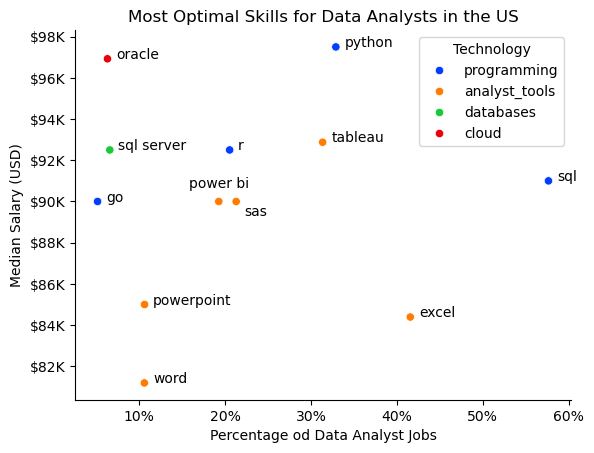

In [21]:
sns.scatterplot(data= DA_skills_stat, x= 'skill_percent', y= 'median_salary', hue= 'technology', palette='bright')
sns.despine()

for i, txt in enumerate(DA_skills_stat.index):
    
    # Adjust text positions for overlapping labels
    if DA_skills_stat.index[i] == "power bi":
        plt.text(DA_skills_stat['skill_percent'].iloc[i]- 3.5, DA_skills_stat['median_salary'].iloc[i] + 650, "power bi")  # Move power bi up and left
    elif DA_skills_stat.index[i] == "sas":
        plt.text(DA_skills_stat['skill_percent'].iloc[i]+ 1, DA_skills_stat['median_salary'].iloc[i] - 700, "sas")  # Move sas down
    else:
        plt.text(DA_skills_stat['skill_percent'].iloc[i]+ 1 , DA_skills_stat['median_salary'].iloc[i], txt)  # Default position

# formating the y and x axis
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

from  matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Set axis labels, title and legend
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percentage od Data Analyst Jobs')
plt.ylabel('Median Salary (USD)')
plt.legend(title= 'Technology')
plt.show()